In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=7
currency_pair = 'EUR=X'
numbers_in_currency = 'EUR'
share_name = 'FORTUM.HE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../csv_files/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,2000-09-30,2427,0,2427,123,417,0,758,3067,0,...,15276,0,0,0,3069,4561,10342,422,-1620,845.6
1,2000-12-31,3082,0,3082,146,437,0,746,3116,0,...,14828,0,0,0,2688,4463,9806,2,904,845.6
2,2001-03-31,2889,0,2889,179,430,0,683,3204,0,...,14537,0,0,0,2746,4161,9560,447,-123,845.6
3,2001-06-30,2503,0,2503,168,495,0,654,2865,0,...,14282,0,0,0,2606,4044,9147,297,-171,845.6
4,2001-09-30,2482,0,2482,109,377,0,639,2887,0,...,13819,0,0,0,2660,3561,8646,145,-189,845.6


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
89,2022-12-31,2023-02-11,889.2,1706,-1035,671,461,3771,1767,465,...,407,23642,0,2831,1648,10122,3558,15972,607,-153
90,2023-03-31,2023-04-21,897.2,2264,-1247,1017,542,3688,1419,439,...,629,21334,0,767,1895,5791,3623,11609,583,-132
91,2023-06-30,2023-07-21,897.2,1368,-790,578,374,4156,851,322,...,606,18930,0,692,423,3979,5113,11248,658,-168
92,2023-09-30,2023-10-21,897.2,1220,-665,555,186,4552,831,322,...,643,18842,0,495,1035,3726,4409,10398,429,-146
93,2023-12-31,2024-02-11,897.2,1858,-1106,752,412,4183,1286,452,...,394,18739,0,507,961,3708,4476,10300,149,-130


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

EUR=X: Data doesn't exist for startDate = 962492400, endDate = 970268400
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/utils.ipynb:68: RuntimeWarning: Mean of empty slice.
  "    return filtered"
/Users/zsolt.nagy/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 970441200, endDate = 978220800
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/utils.ipynb:68: RuntimeWarning: Mean of empty slice.
  "    return filtered"
/Users/zsolt.nagy/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 978220800, endDate = 985993200
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/ut

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
89,2022-12-31,2023-02-11,889.2,1706,-1035,671,461,3771,1767,465,...,23642,0,2831,1648,10122,3558,15972,607,-153,0.980663
90,2023-03-31,2023-04-21,897.2,2264,-1247,1017,542,3688,1419,439,...,21334,0,767,1895,5791,3623,11609,583,-132,0.932003
91,2023-06-30,2023-07-21,897.2,1368,-790,578,374,4156,851,322,...,18930,0,692,423,3979,5113,11248,658,-168,0.918362
92,2023-09-30,2023-10-21,897.2,1220,-665,555,186,4552,831,322,...,18842,0,495,1035,3726,4409,10398,429,-146,0.918837
93,2023-12-31,2024-02-11,897.2,1858,-1106,752,412,4183,1286,452,...,18739,0,507,961,3708,4476,10300,149,-130,0.929674


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
89,2022-12-31,2023-02-11,889.2,1706,-1035,671,461,3771,1767,465,...,23642,0,2831,1648,10122,3558,15972,607,-153,0.980663
90,2023-03-31,2023-04-21,897.2,2264,-1247,1017,542,3688,1419,439,...,21334,0,767,1895,5791,3623,11609,583,-132,0.932003
91,2023-06-30,2023-07-21,897.2,1368,-790,578,374,4156,851,322,...,18930,0,692,423,3979,5113,11248,658,-168,0.918362
92,2023-09-30,2023-10-21,897.2,1220,-665,555,186,4552,831,322,...,18842,0,495,1035,3726,4409,10398,429,-146,0.918837
93,2023-12-31,2024-02-11,897.2,1858,-1106,752,412,4183,1286,452,...,18739,0,507,961,3708,4476,10300,149,-130,0.929674


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2004-02-16,1.833011,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,0.386789,0.613211,11.932702,inf,25.849658,13.001815,0.368699,0.091646,0.062794,0.162348
1,2004-02-23,1.872572,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,0.386789,0.613211,11.932702,inf,25.849658,13.001815,0.368699,0.091646,0.062794,0.162348
2,2004-03-01,1.912134,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,0.386789,0.613211,11.932702,inf,25.849658,13.001815,0.368699,0.091646,0.062794,0.162348
3,2004-03-08,1.896749,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,0.386789,0.613211,11.932702,inf,25.849658,13.001815,0.368699,0.091646,0.062794,0.162348
4,2004-03-15,1.923123,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,0.386789,0.613211,11.932702,inf,25.849658,13.001815,0.368699,0.091646,0.062794,0.162348


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2004-02-16,1.833011,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,13.001815,0.368699,0.091646,0.062794,0.162348,1.496019,0.242875,0.137104,0.993379,1.034481
1,2004-02-23,1.872572,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,13.001815,0.368699,0.091646,0.062794,0.162348,1.528307,0.248117,0.140063,0.996338,1.056808
2,2004-03-01,1.912134,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,13.001815,0.368699,0.091646,0.062794,0.162348,1.560595,0.253359,0.143022,0.999297,1.079135
3,2004-03-08,1.896749,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,13.001815,0.368699,0.091646,0.062794,0.162348,1.548039,0.251321,0.141872,0.998146,1.070452
4,2004-03-15,1.923123,2003-12-31,2837.0,1.225259,7.547125,848.8,1504.0,1.771913,439.0,...,13.001815,0.368699,0.091646,0.062794,0.162348,1.569564,0.254815,0.143844,1.000119,1.085337


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

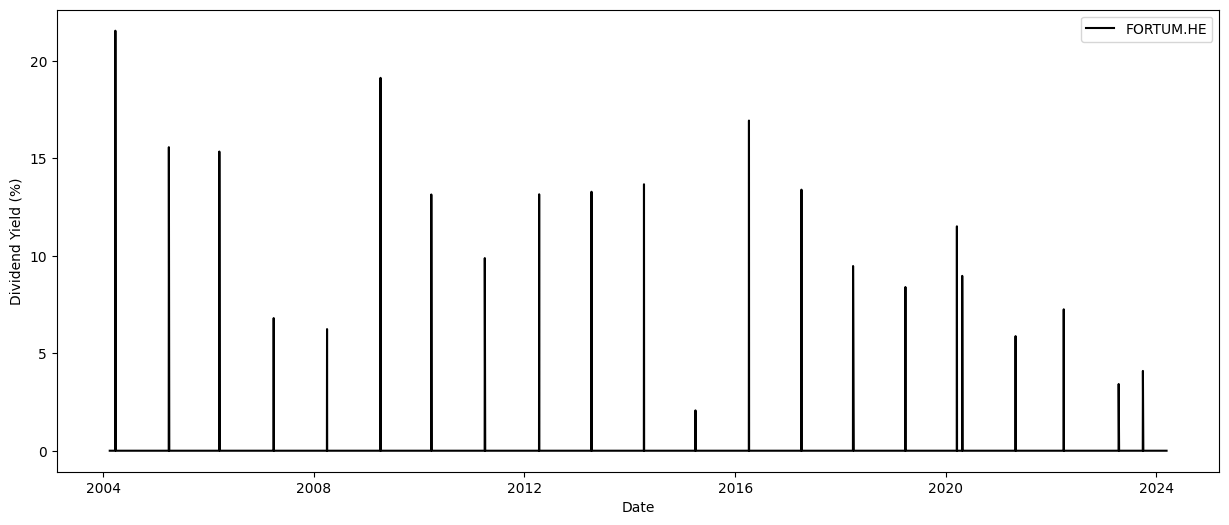

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.384557
share_price      1.000000
Name: share_price, dtype: float64


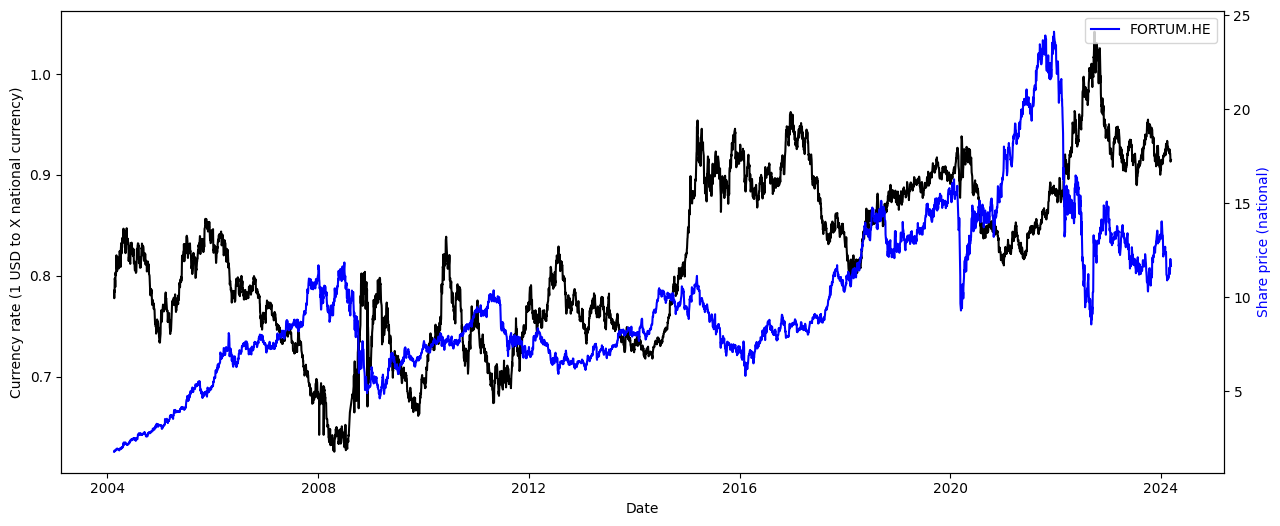

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

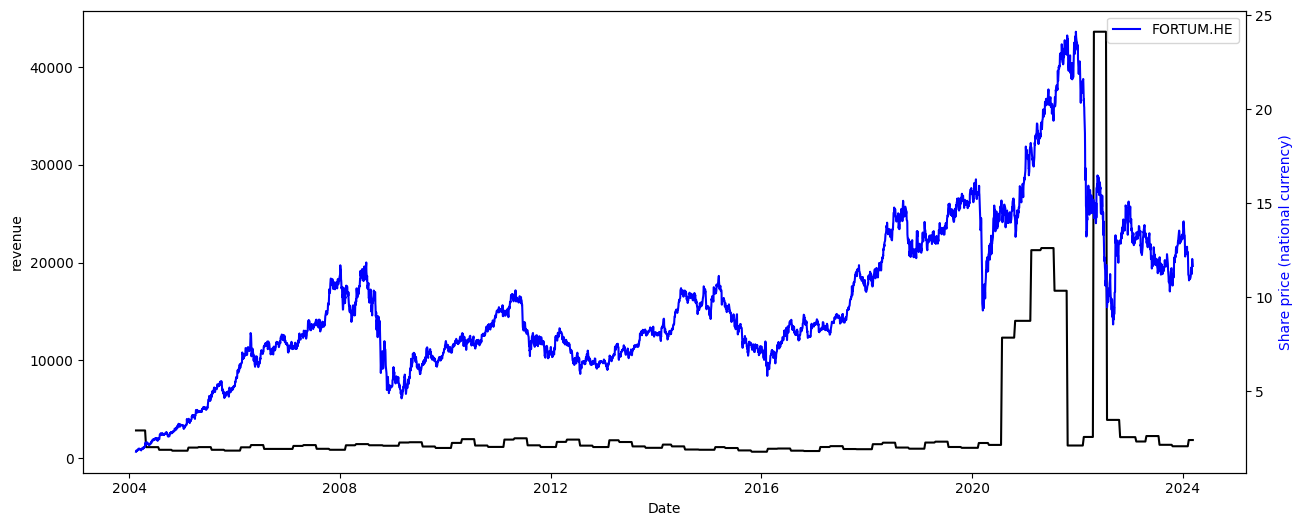

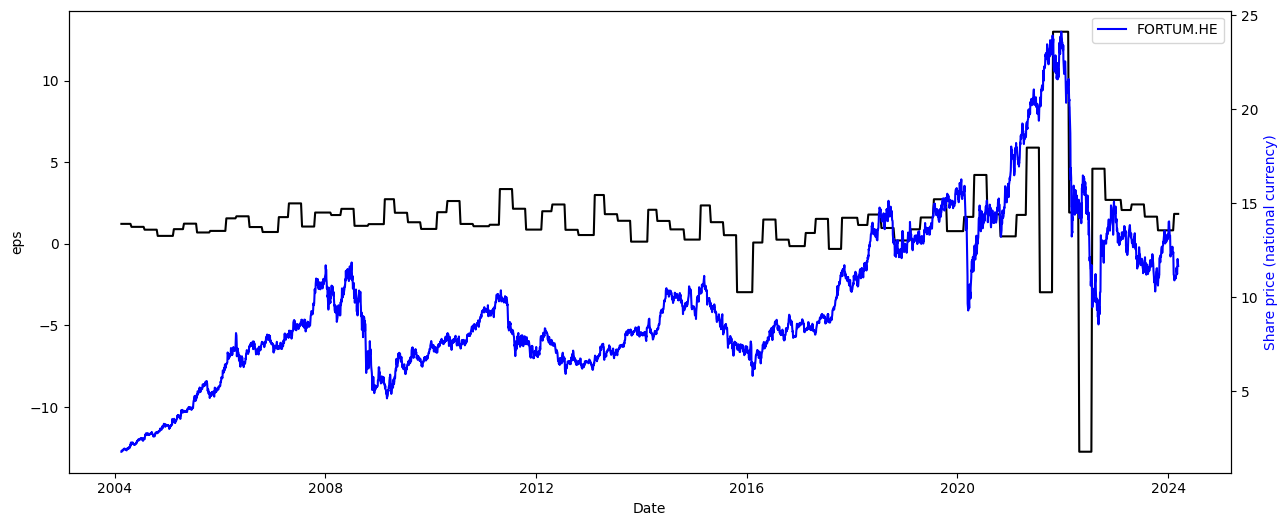

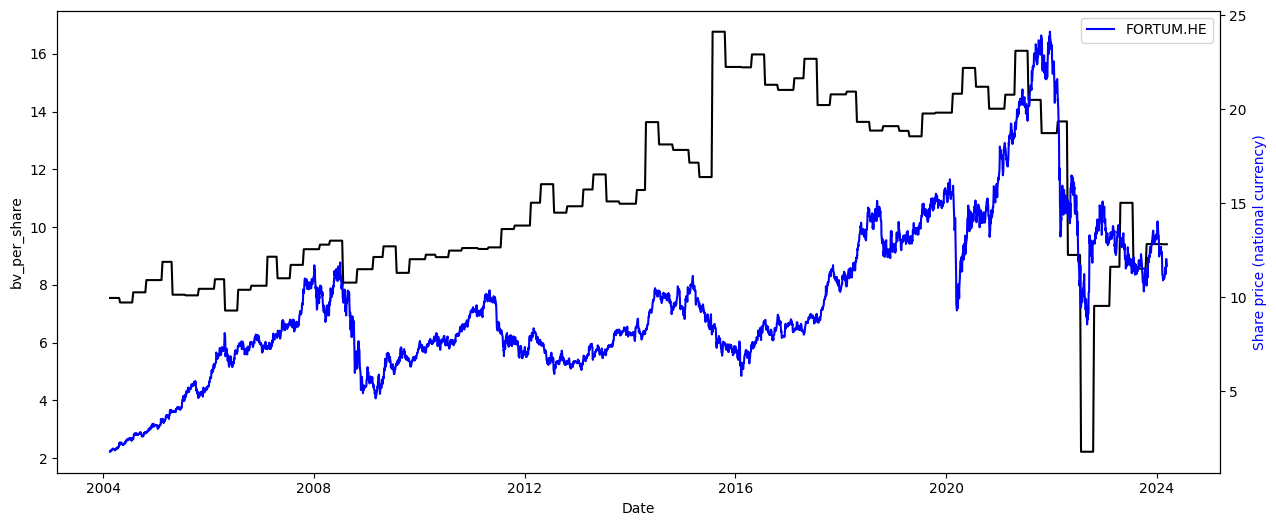

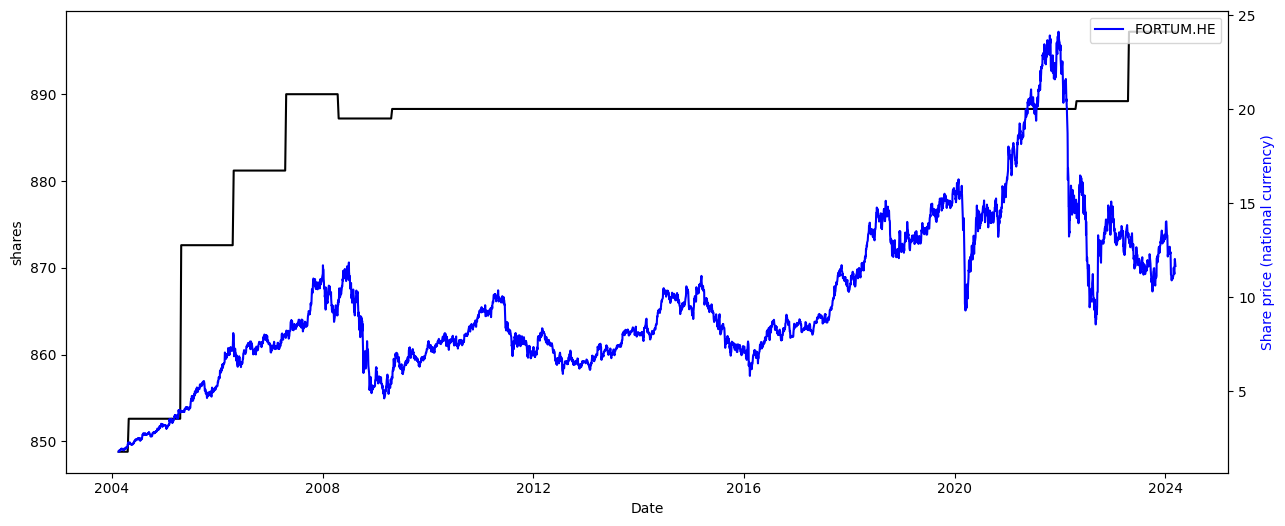

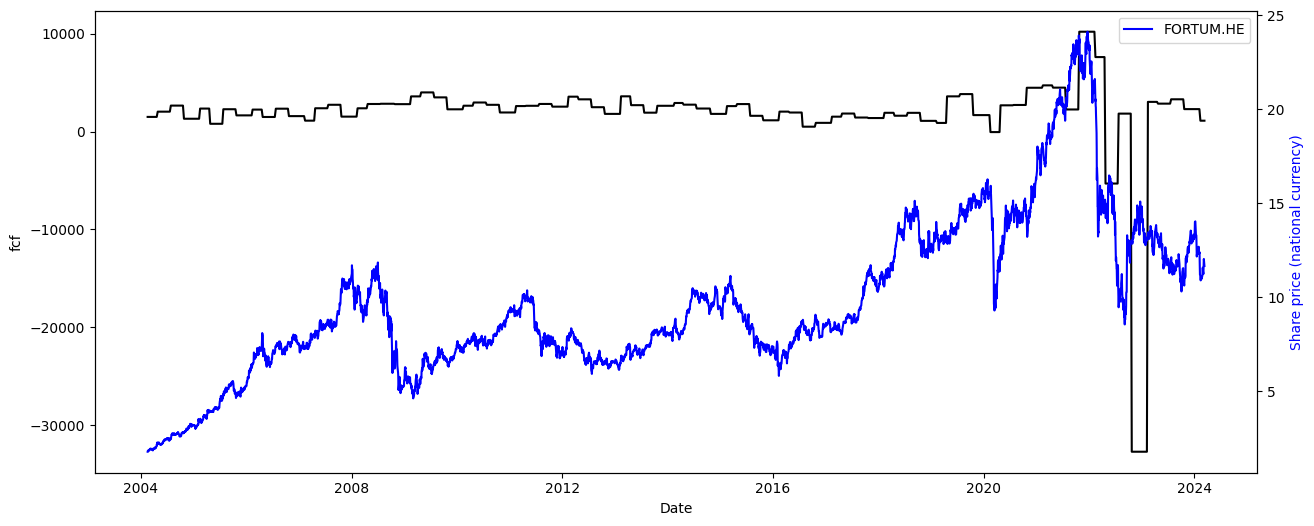

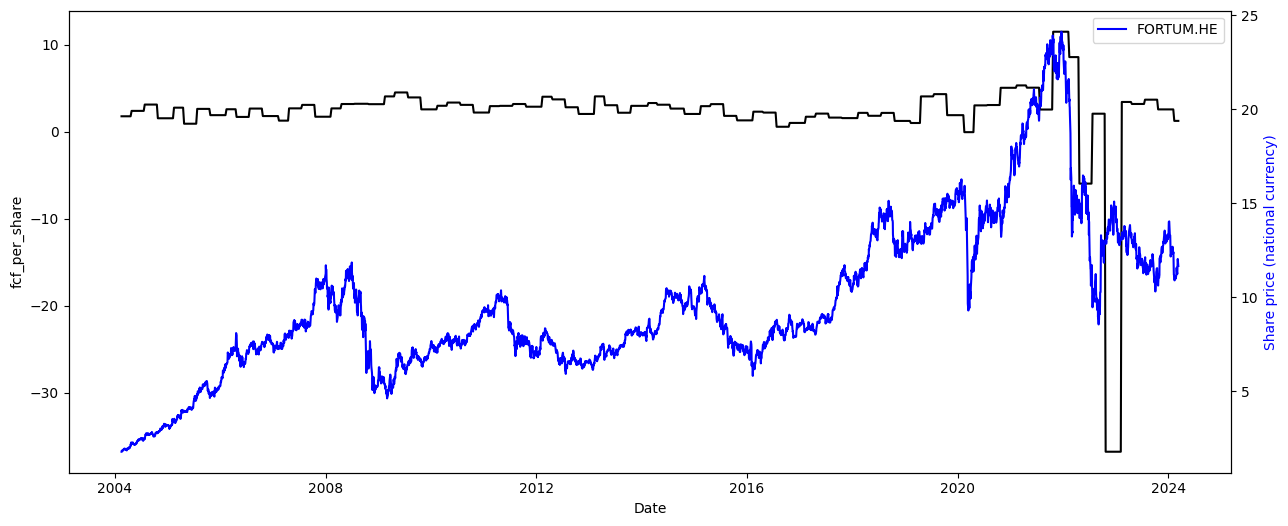

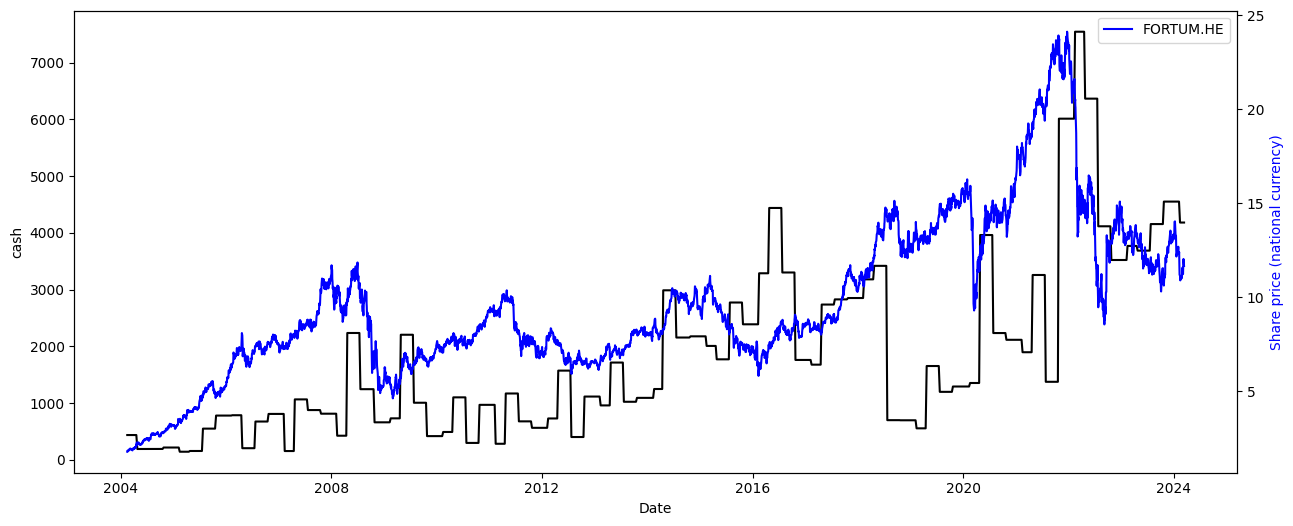

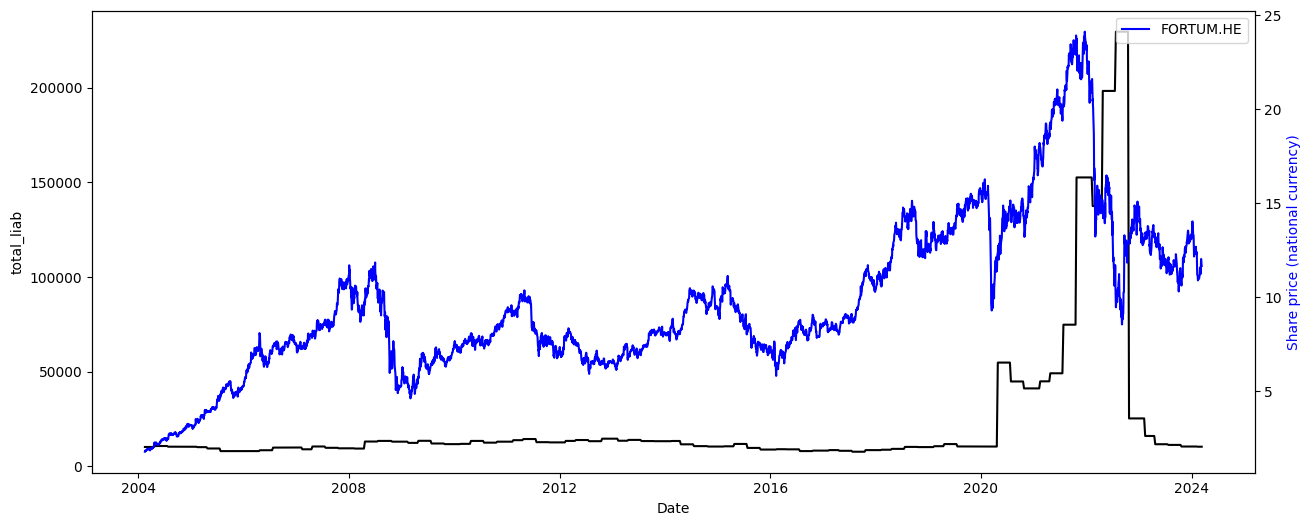

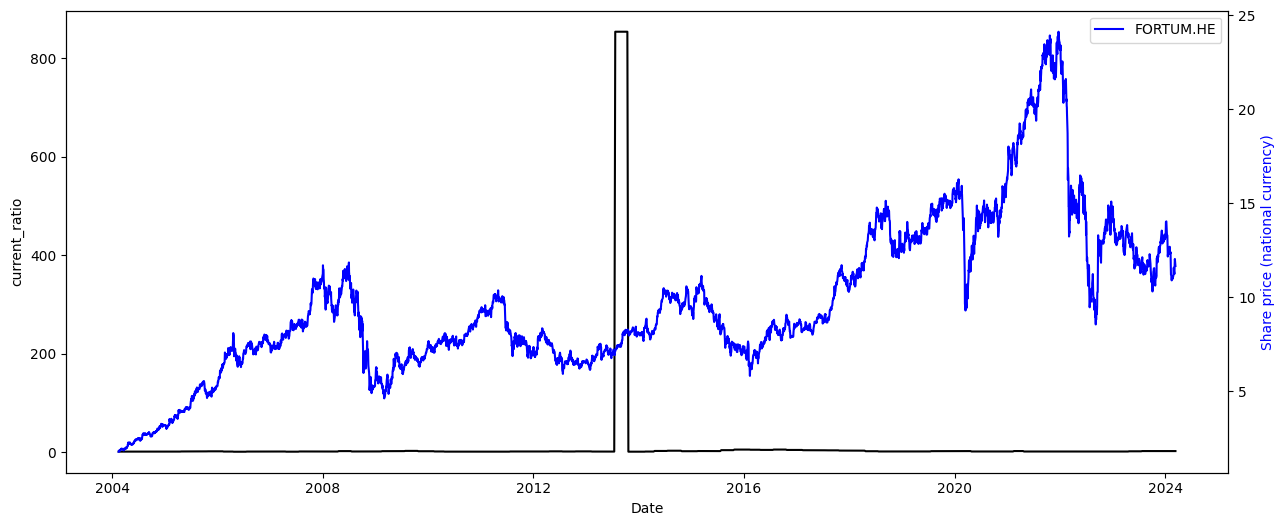

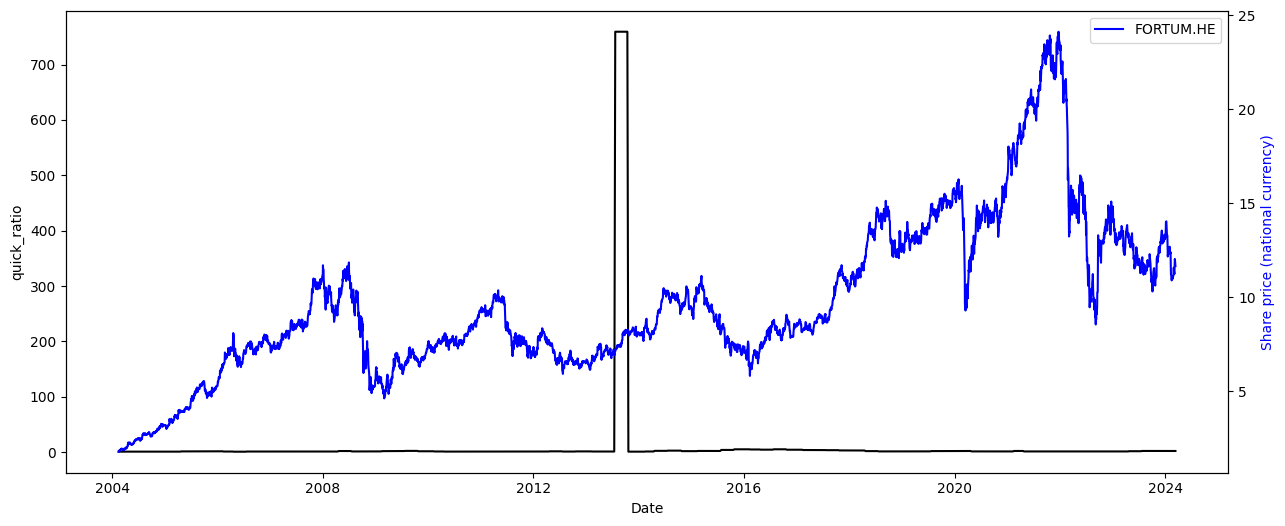

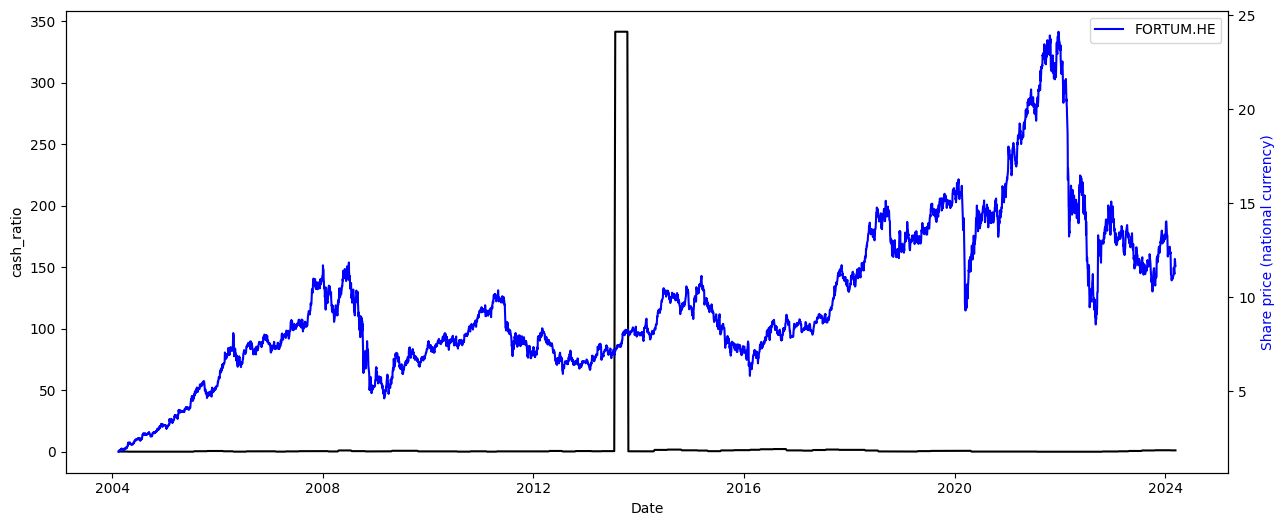

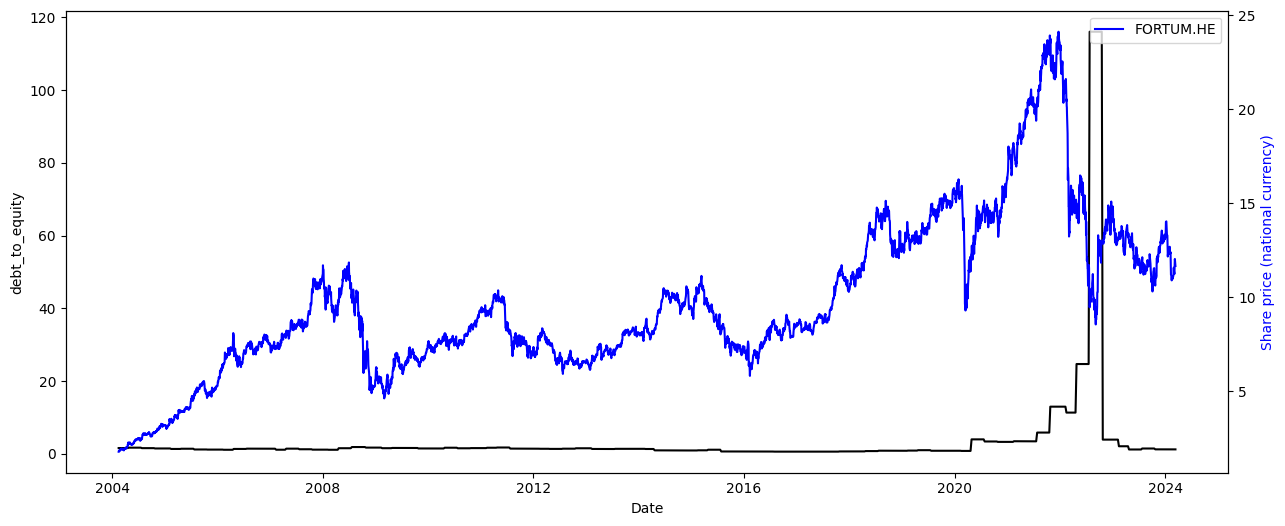

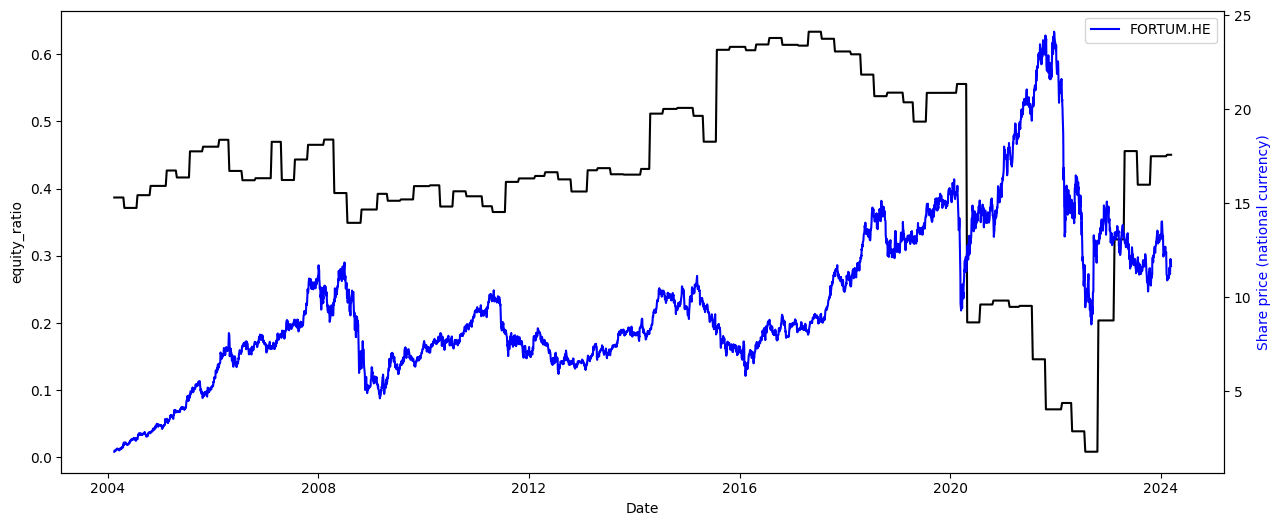

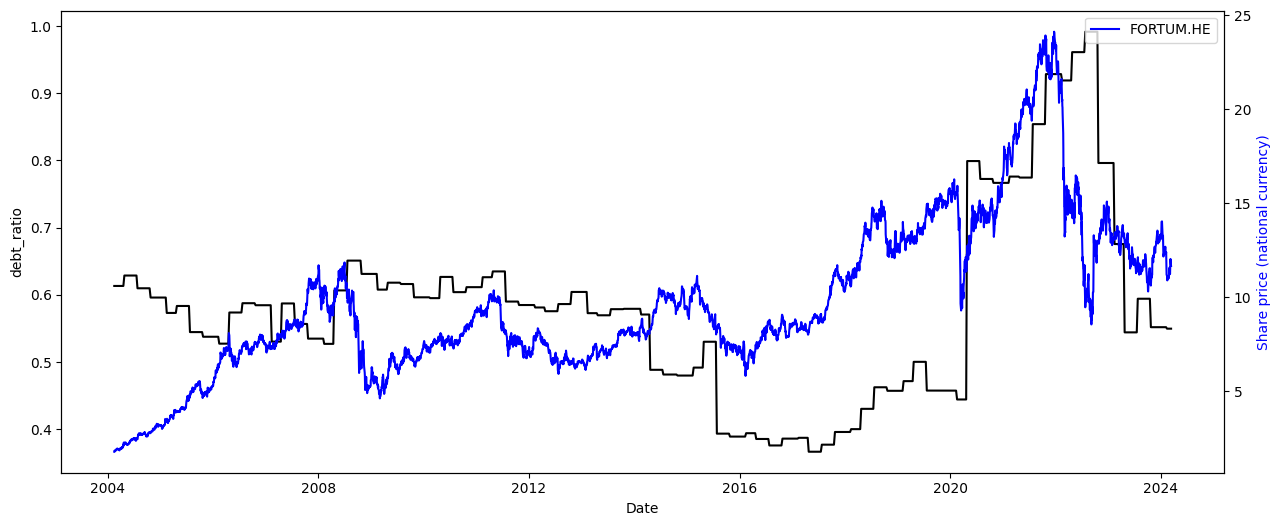

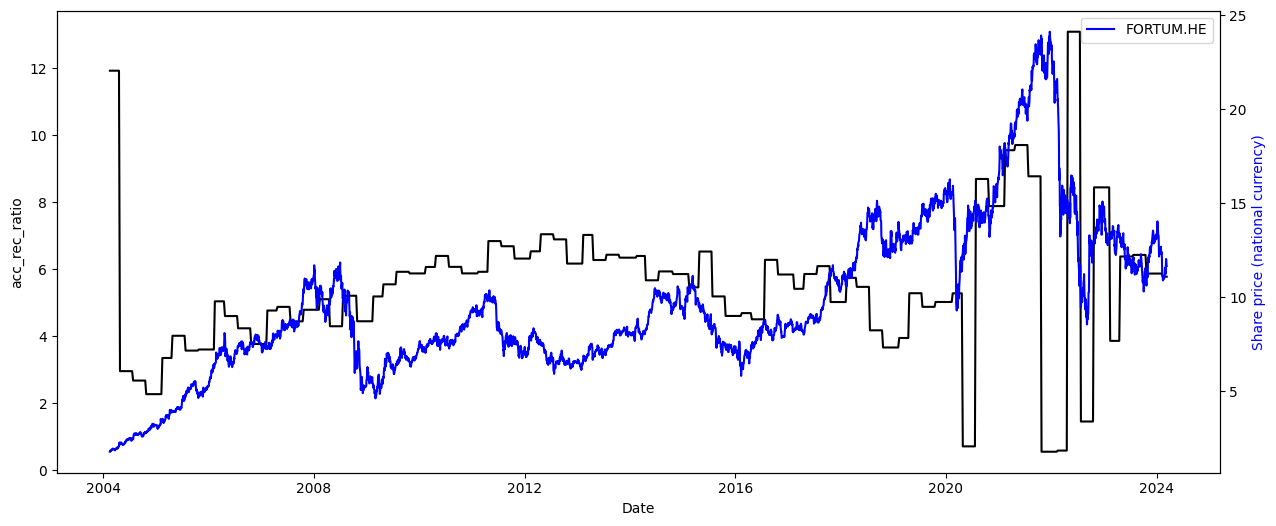

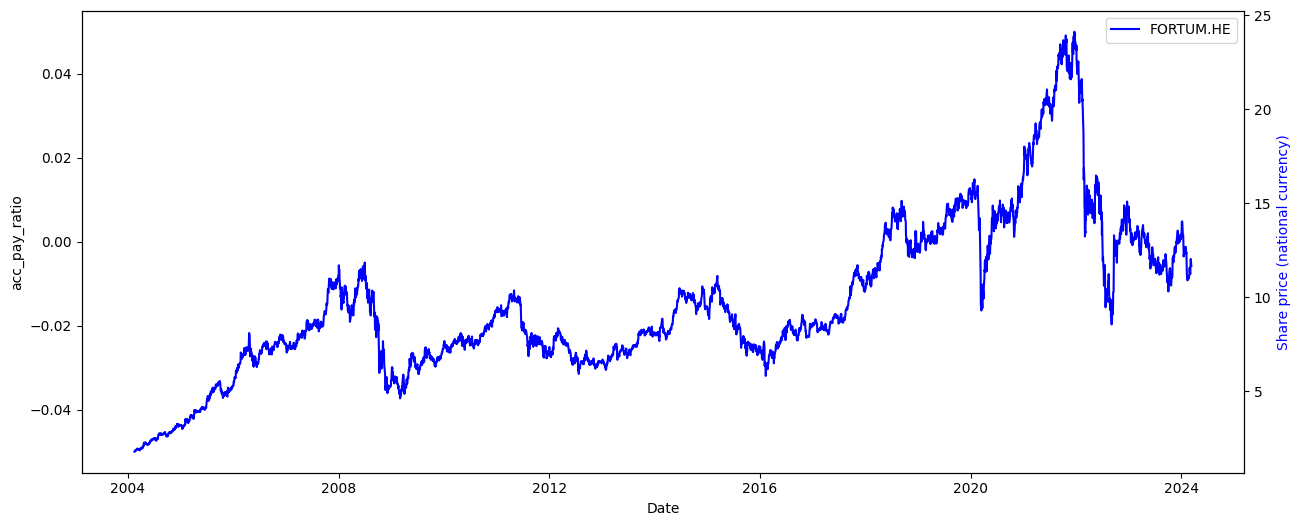

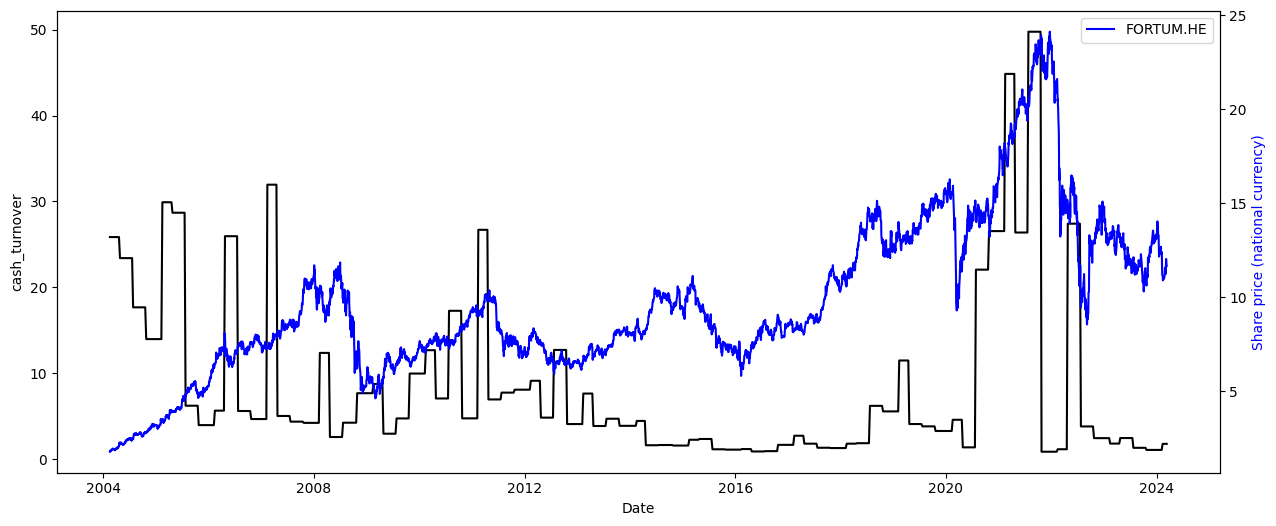

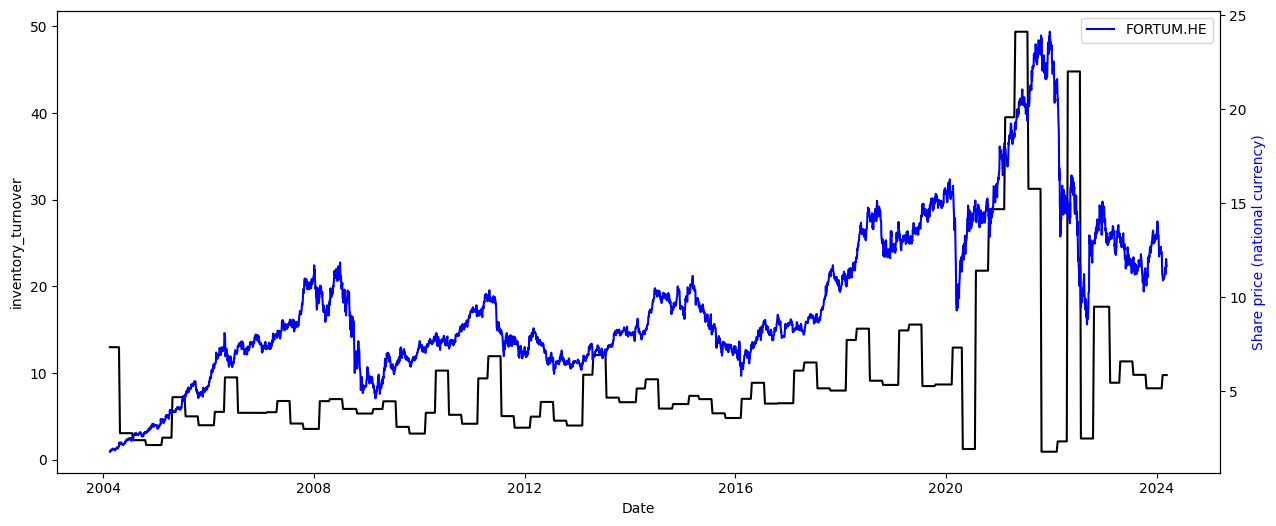

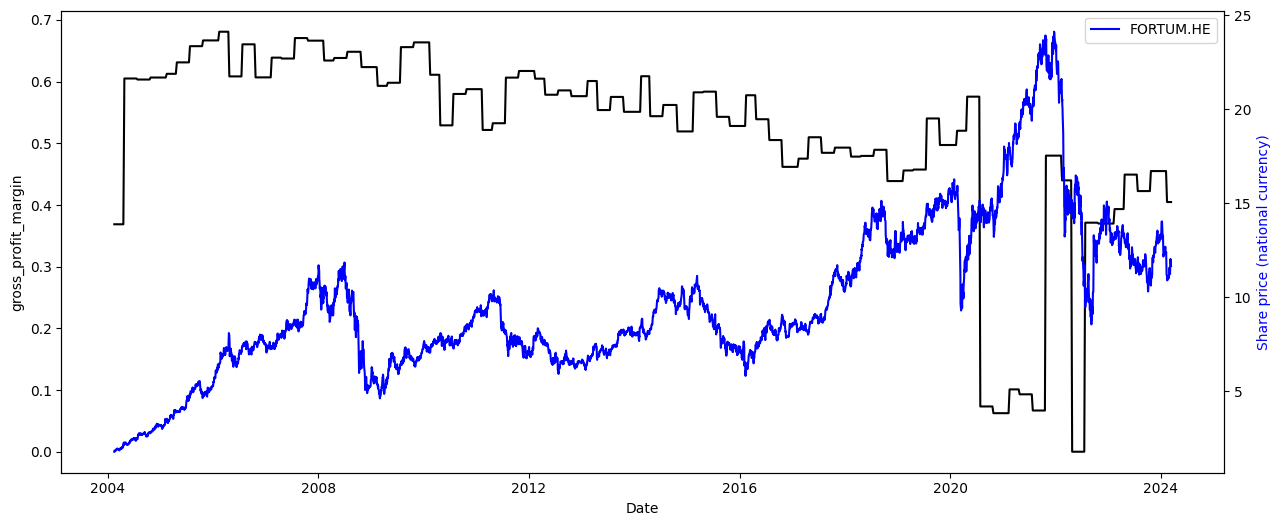

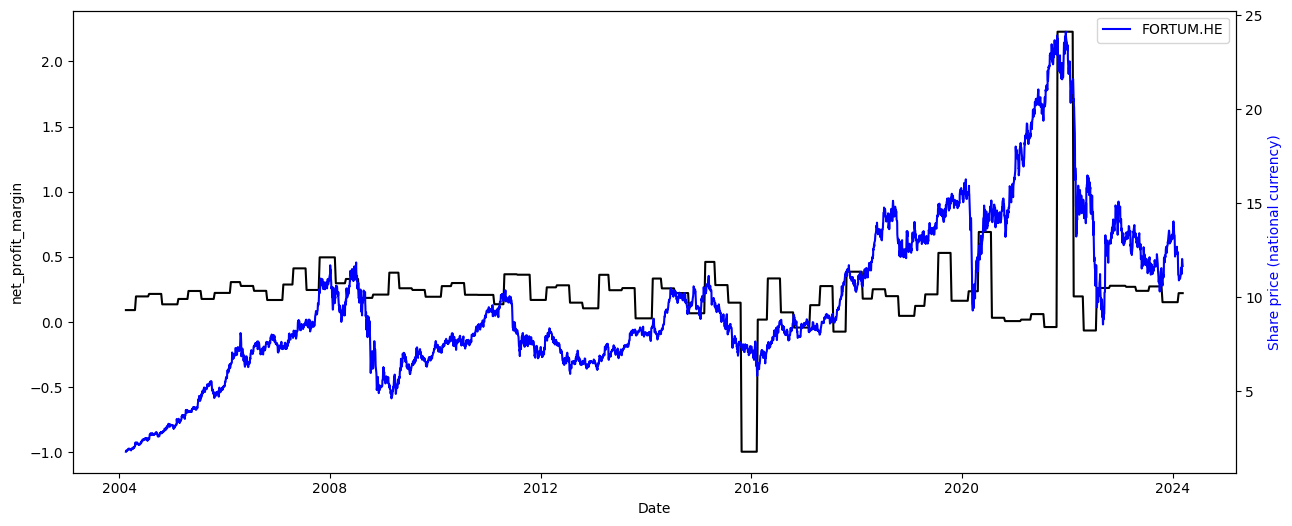

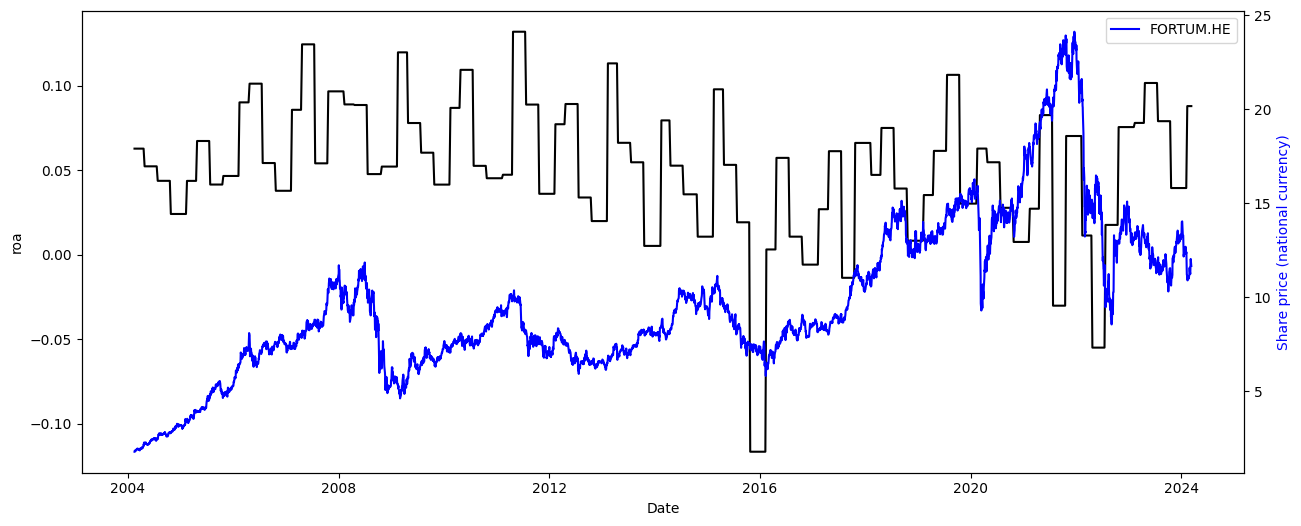

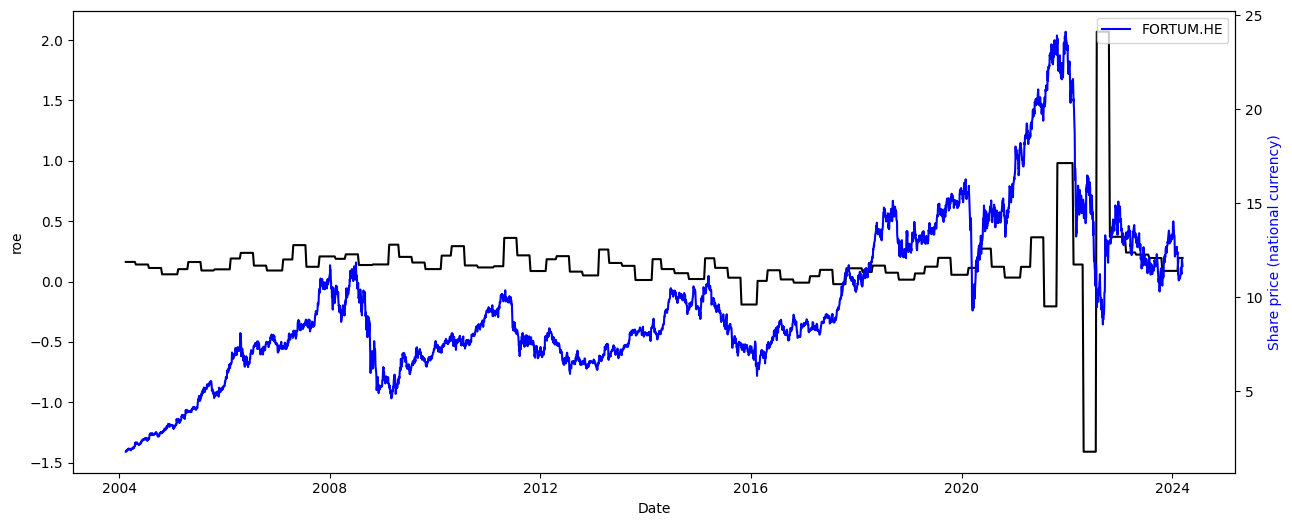

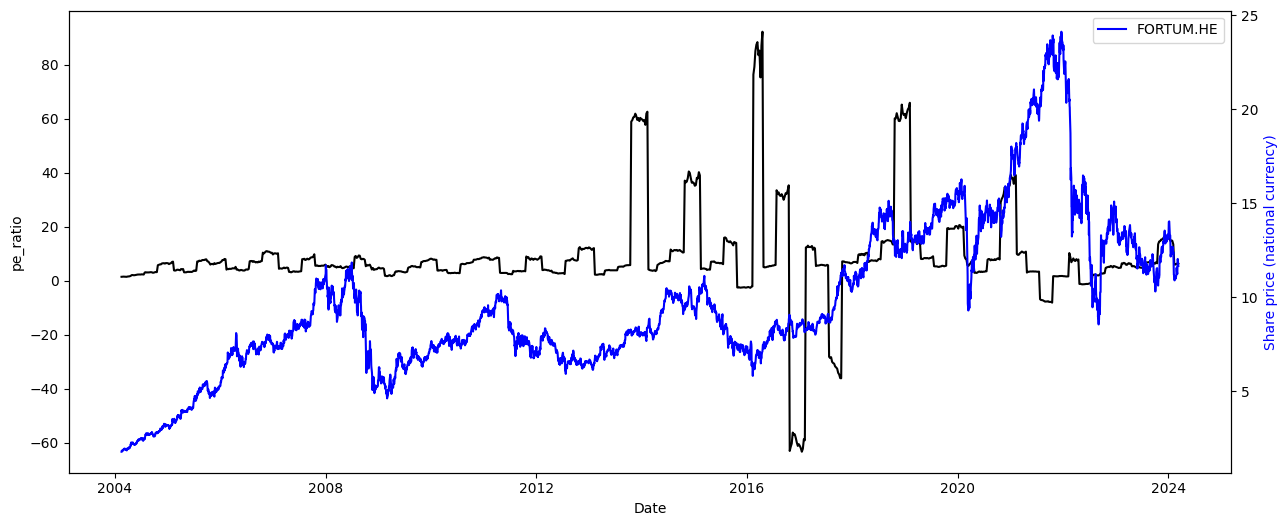

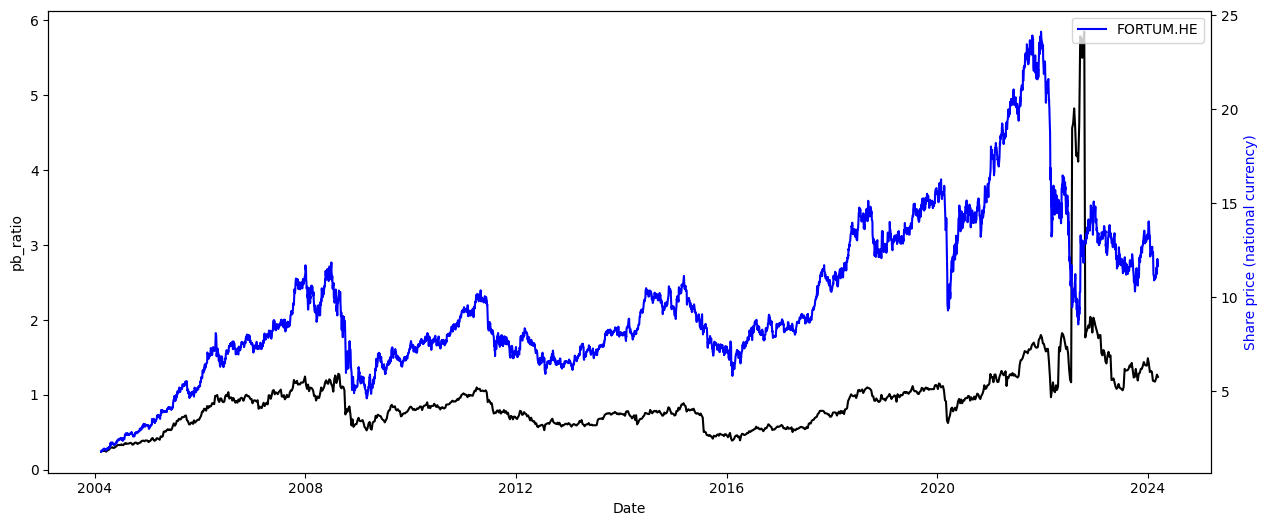

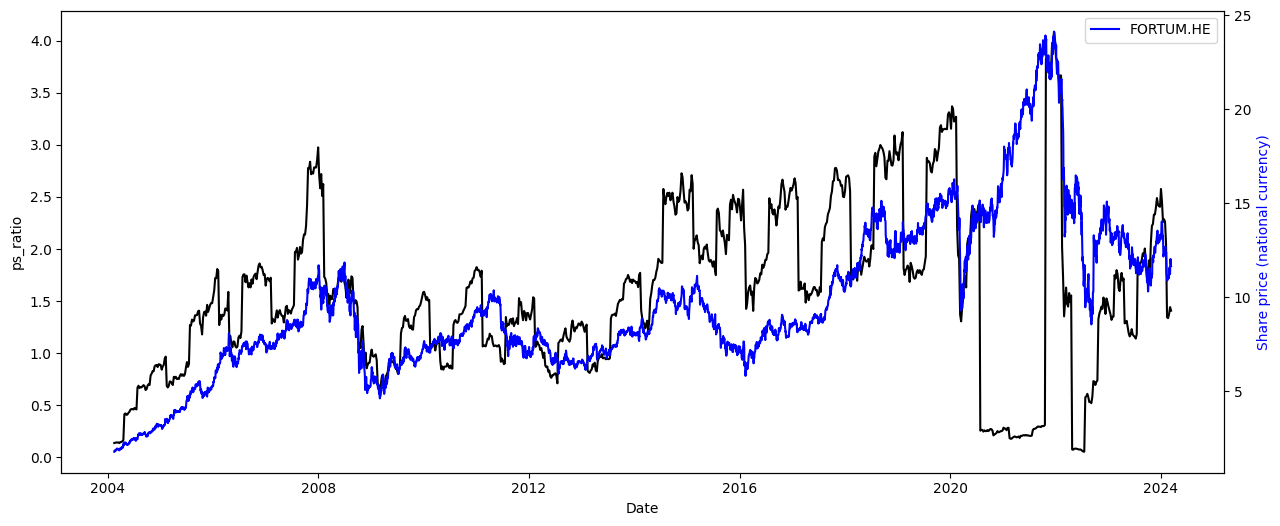

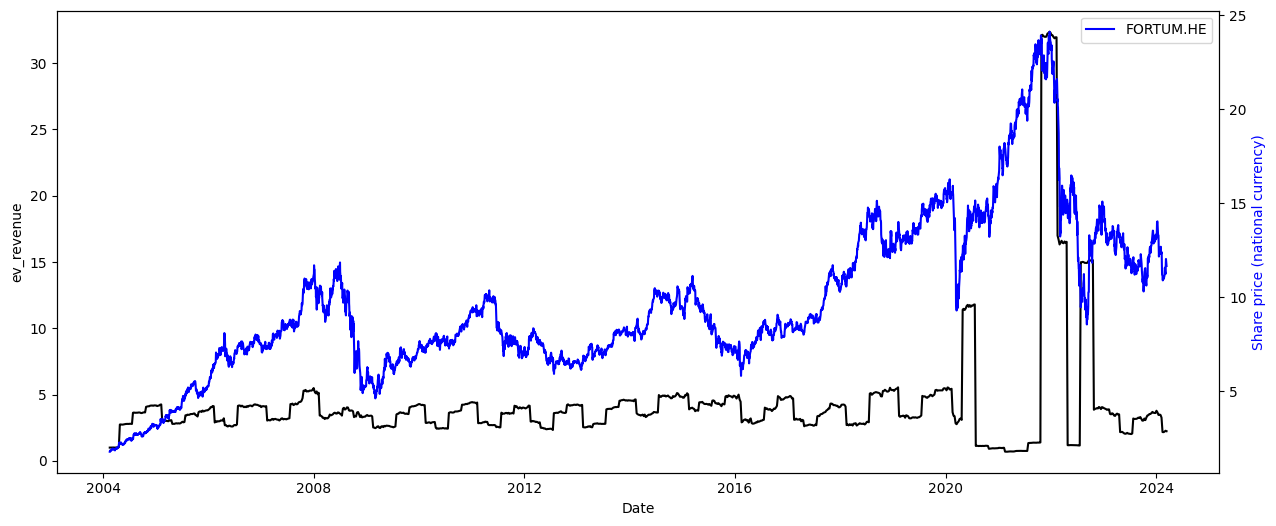

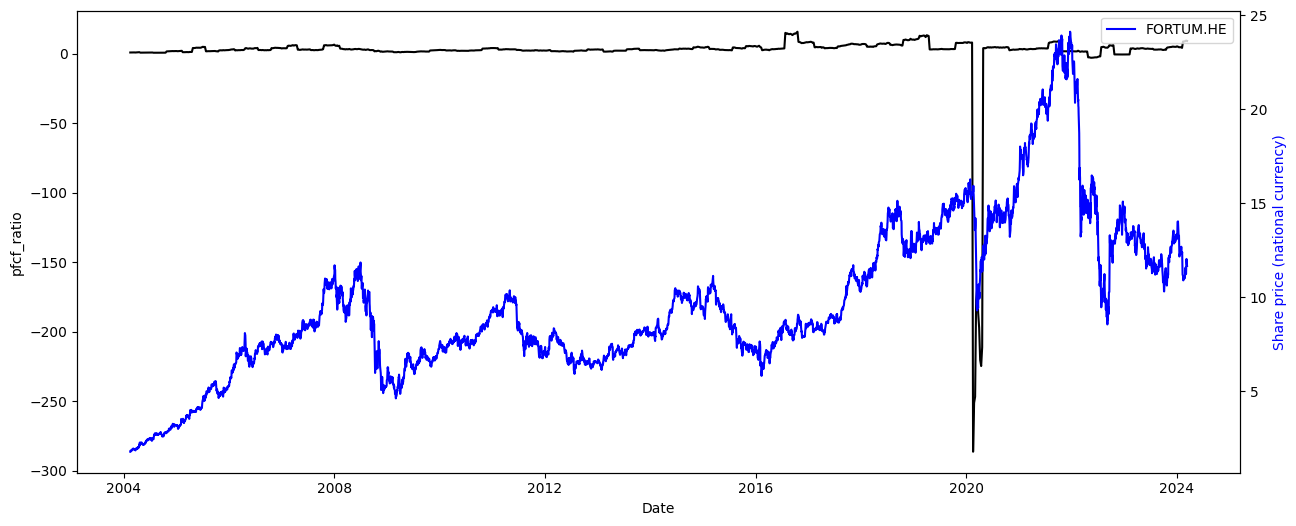

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

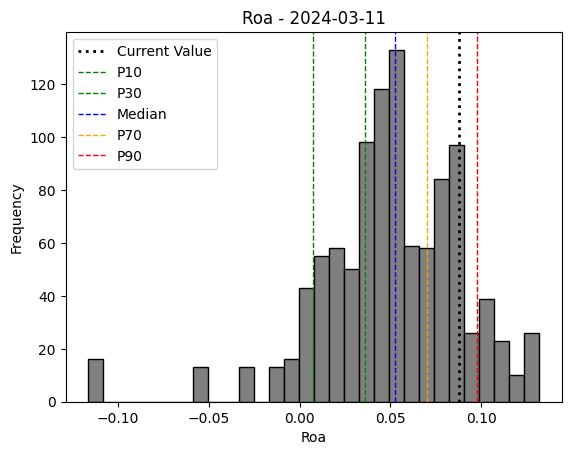

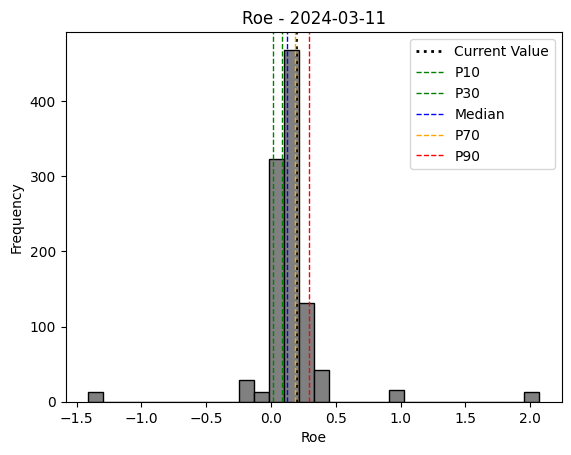

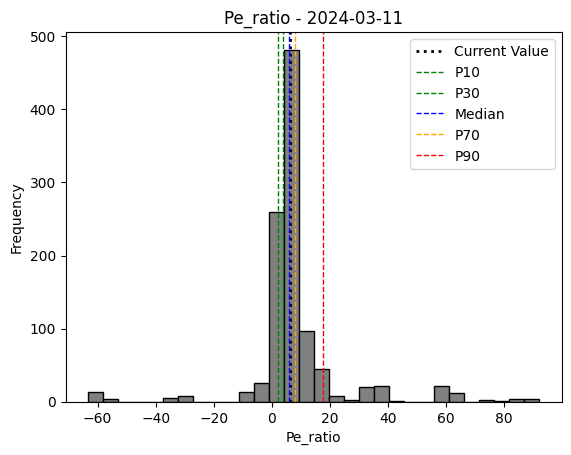

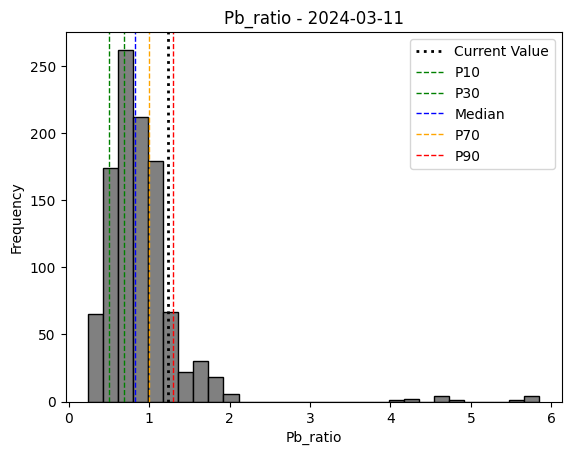

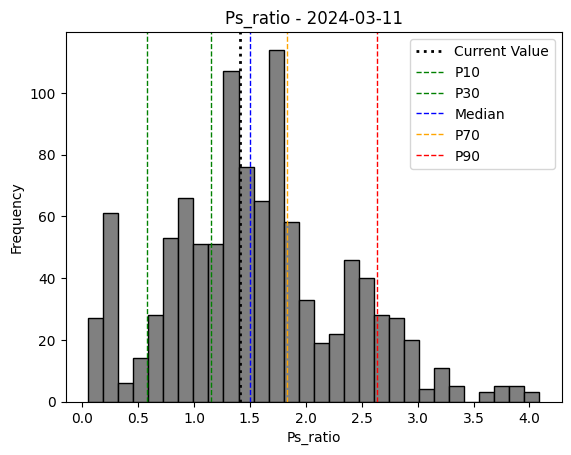

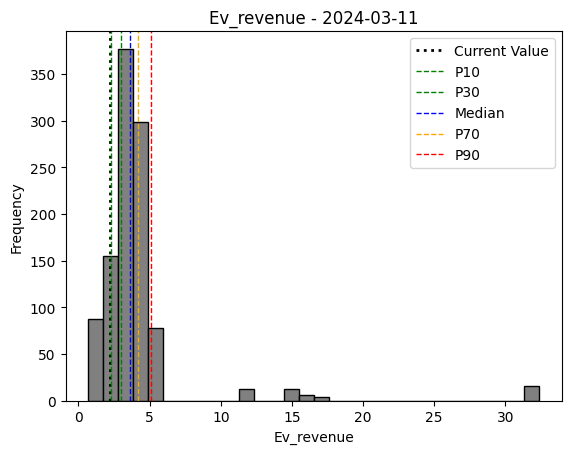

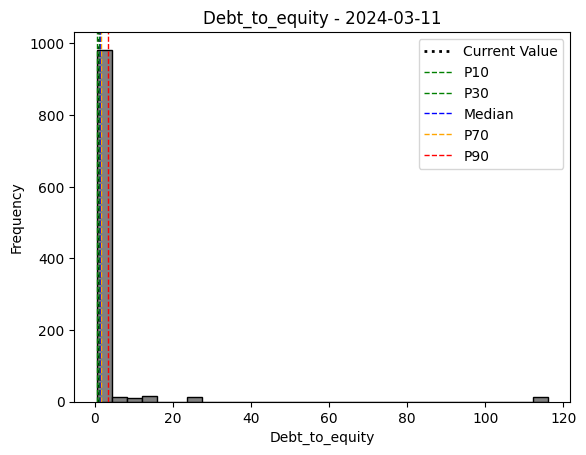

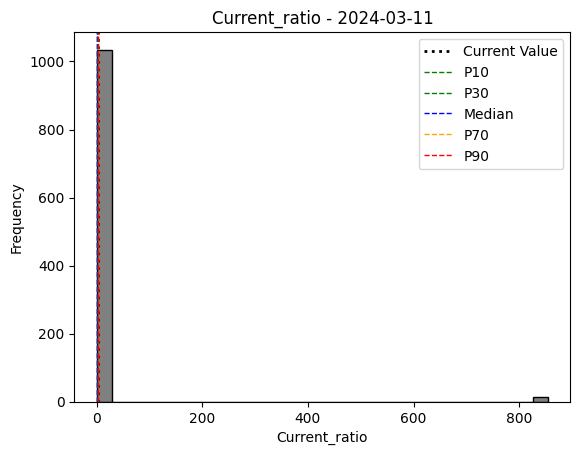

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.394717,-0.110695,-0.000011,-0.089316,-0.044422,-0.144886,0.008535
roe,0.394717,1.000000,-0.057615,0.590454,0.061137,0.516515,0.603203,-0.007825
pe_ratio,-0.110695,-0.057615,1.000000,-0.028814,0.104978,-0.028100,-0.060981,-0.019885
pb_ratio,-0.000011,0.590454,-0.028814,1.000000,-0.016681,0.383933,0.851350,-0.043995
ps_ratio,-0.089316,0.061137,0.104978,-0.016681,1.000000,0.481451,-0.165515,-0.013699
ev_revenue,-0.044422,0.516515,-0.028100,0.383933,0.481451,1.000000,0.376249,-0.008260
debt_to_equity,-0.144886,0.603203,-0.060981,0.851350,-0.165515,0.376249,1.000000,-0.019373
current_ratio,0.008535,-0.007825,-0.019885,-0.043995,-0.013699,-0.008260,-0.019373,1.000000


5 timestemos have been found!


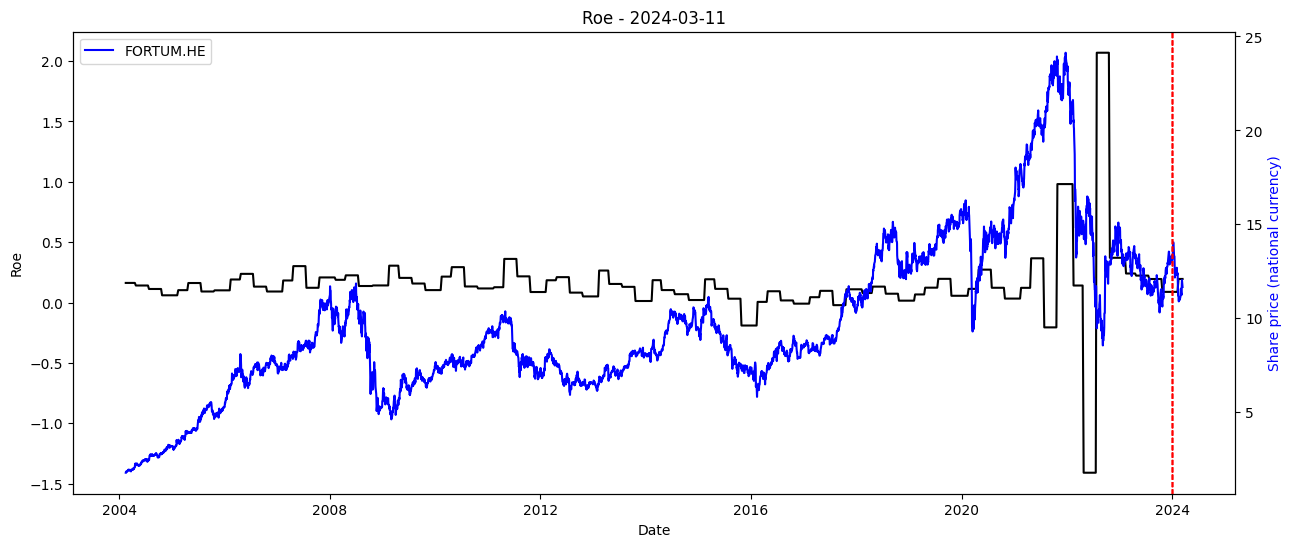

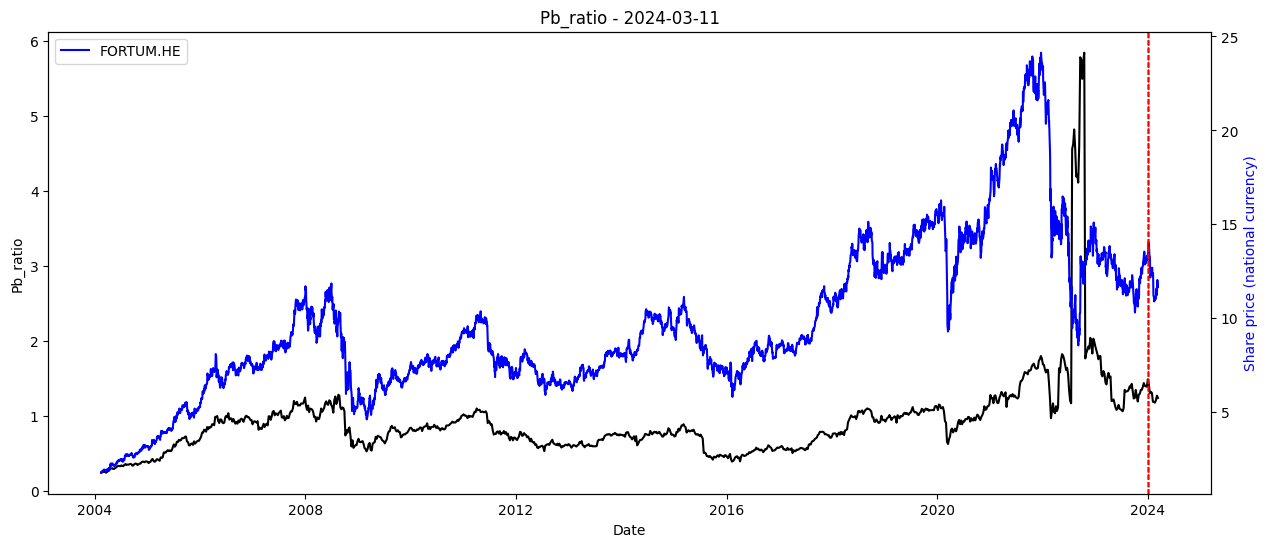

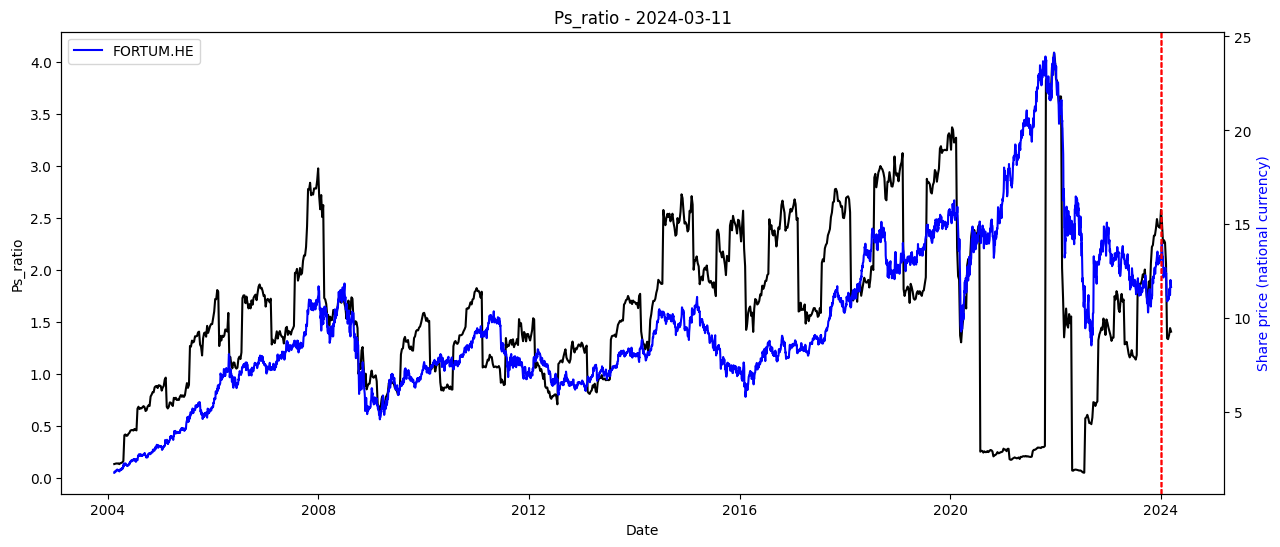

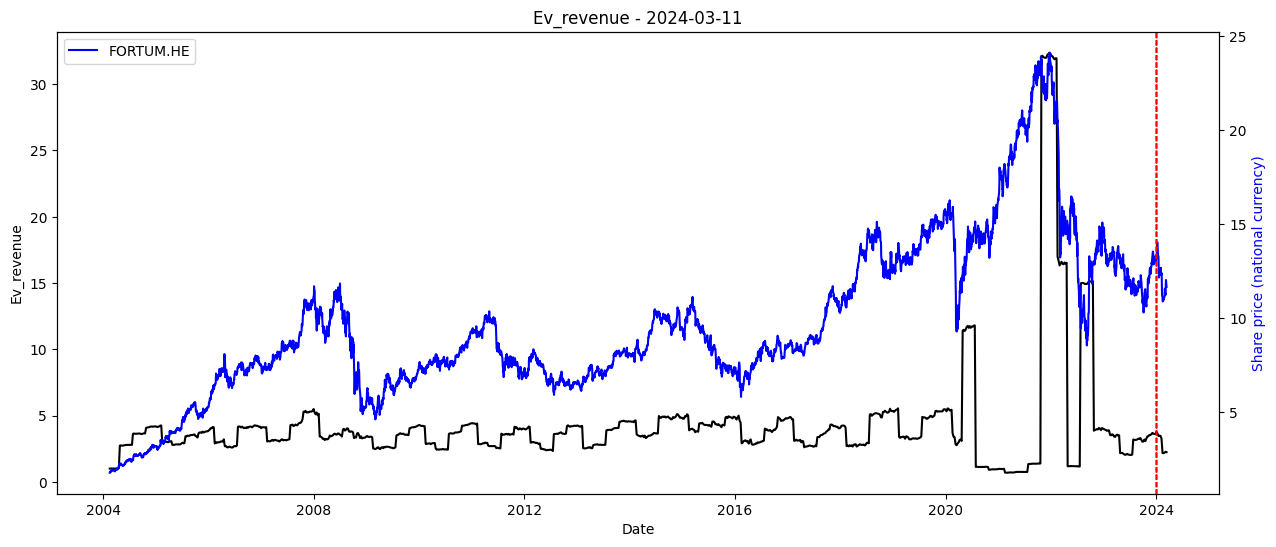

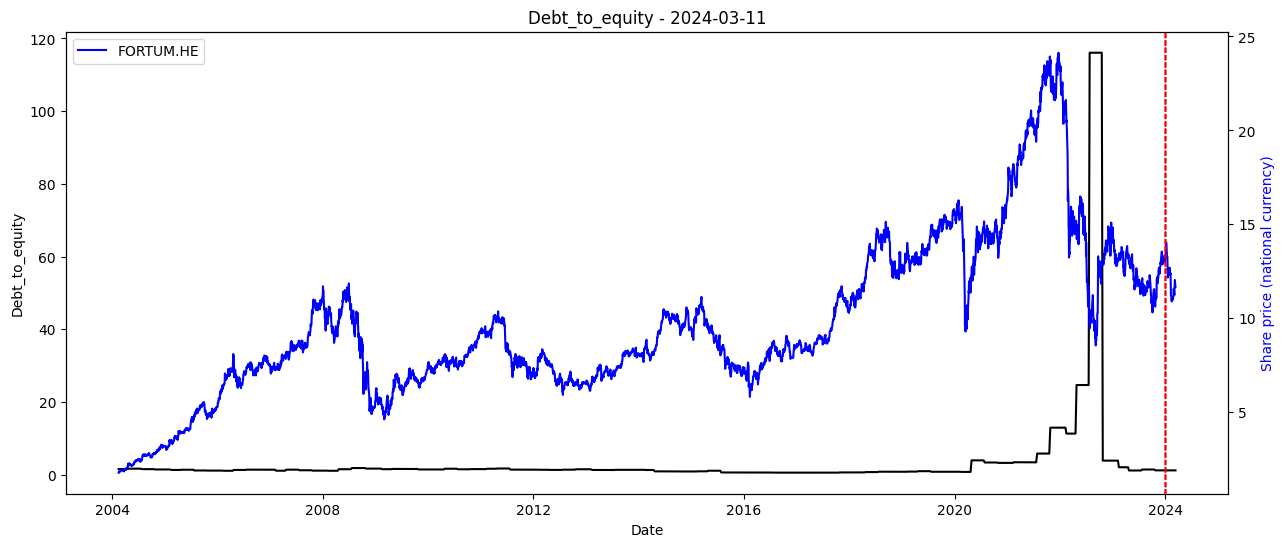

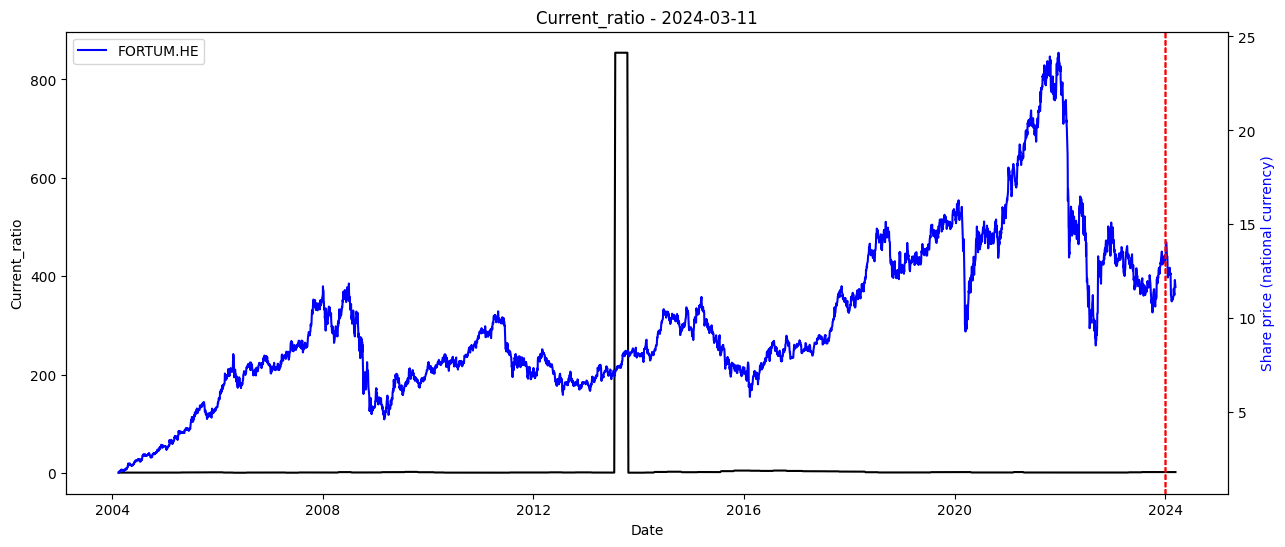

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )